In [159]:
import numpy as np
import matplotlib.pyplot as pyp
import sys
import os
import matplotlib
import pandas as pd
import csv
import scipy.interpolate as interpolate
%matplotlib inline

# Spectra Plots

In [160]:
measDirc = "/home/radio/data/beacon_august2018/20180810/"
measDircThur = "/home/radio/data/beacon_august2018/20180809/"
measDircSat = "/home/radio/data/beacon_august2018/20180811/"

termFi = measDirc + 'specanalyzer_run1_2018-08-10_10-06-52.hdf5'
termSpecHead = pd.read_hdf(termFi, key='header')
termSpectra = pd.read_hdf(termFi, key='spectra')

antFi2 = measDirc + 'specanalyzer_run2_2018-08-10_10-16-45.hdf5'
antSpecHead2 = pd.read_hdf(antFi2, key='header')
antSpectra2 = pd.read_hdf(antFi2, key='spectra')

antFi13 = measDircThur + 'specanalyzer_run13_2018-08-09_16-39-10.hdf5'
antSpecHead13 = pd.read_hdf(antFi13, key='header')
antSpectra13 = pd.read_hdf(antFi13, key='spectra')

antFi8 = measDircSat + 'specanalyzer_run8_2018-08-11_11-09-42.hdf5'
antSpecHead8 = pd.read_hdf(antFi8, key='header')
antSpectra8 = pd.read_hdf(antFi8, key='spectra')

antFi19 = measDircSat + 'specanalyzer_run19_2018-08-11_12-54-55.hdf5'
antSpecHead19 = pd.read_hdf(antFi19, key='header')
antSpectra19 = pd.read_hdf(antFi19, key='spectra')

antFi15 = measDirc + 'specanalyzer_run15_2018-08-10_13-47-07.hdf5'
antSpecHead15 = pd.read_hdf(antFi15, key='header')
antSpectra15 = pd.read_hdf(antFi15, key='spectra')

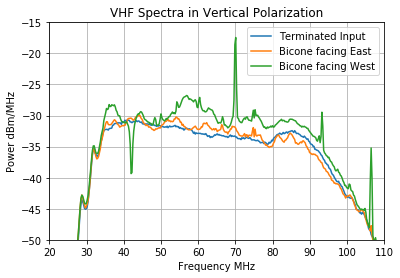

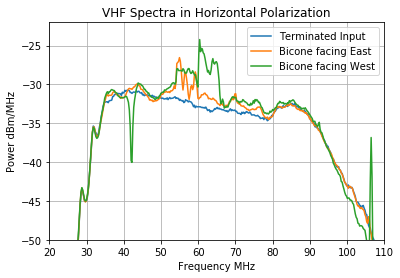

In [161]:
spec = termSpectra[termSpectra.keys()[0]]
rbw = 0.3 # MHz. Fix later. Read from header
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw)+9.9, label='Terminated Input' )

#spec = antSpectra2[antSpectra2.keys()[0]]
rbw = 0.3 # MHz. Fix later. Read from header
#pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw)+9.9, label='Recorded Fri 8/10, East')

#East
spec = antSpectra13[antSpectra13.keys()[0]]
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw)+9.9, label='Bicone facing East')
#pyp.plot(prediction.frequency_MHz, 10*np.log10(prediction.combined_power_W_per_MHz*1e3))

#West
spec = antSpectra8[antSpectra8.keys()[0]]
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw)+9.9, label='Bicone facing West')

pyp.legend()
pyp.grid()
pyp.ylabel('Power dBm/MHz')
pyp.xlabel('Frequency MHz')
pyp.title('VHF Spectra in Vertical Polarization')
pyp.xlim(20,110)
pyp.ylim(-50,-15)

pyp.savefig("/home/radio/Desktop/VHFSpectraEastVsWest.pdf")

pyp.figure(2)
spec = termSpectra[termSpectra.keys()[0]]
rbw = 0.3 # MHz. Fix later. Read from header
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw)+9.9, label='Terminated Input' )

#East
spec = antSpectra15[antSpectra15.keys()[0]]
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw)+9.9, label='Bicone facing East')
#pyp.plot(prediction.frequency_MHz, 10*np.log10(prediction.combined_power_W_per_MHz*1e3))

#West
spec = antSpectra19[antSpectra19.keys()[0]]
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw)+9.9, label='Bicone facing West')


pyp.legend()
pyp.grid()
pyp.ylabel('Power dBm/MHz')
pyp.xlabel('Frequency MHz')
pyp.title('VHF Spectra in Horizontal Polarization')
pyp.xlim(20,110)
pyp.ylim(-50,-22)

pyp.savefig("/home/radio/Desktop/VHFSpectraEastVsWest2.jpeg")


# Photon Counter Rates 

In [162]:
dirc = '/home/radio/data/beacon_august2018/20180810/'
dirc11 = '/home/radio/data/beacon_august2018/20180811/'

#east
finame14 = dirc + 'photonCounter_run14_2018-08-10_13-38-45.hdf5'
hpolAnt14 = pd.read_hdf(finame14, key='rates')

#west
finame20 = dirc11 + 'photonCounter_run20_2018-08-11_12-57-37.hdf5'
hpolAnt20 = pd.read_hdf(finame20, key='rates')

#east
finame7 = dirc + 'photonCounter_run7_2018-08-10_11-42-26.hdf5'
vpolAnt7 = pd.read_hdf(finame7, key='rates')

#west
finame12 = dirc11 + 'photonCounter_run12_2018-08-11_11-50-34.hdf5'
vpolAnt12 = pd.read_hdf(finame12, key='rates')

# east, terminated
finame13 = dirc + 'photonCounter_run13_2018-08-10_13-30-13.hdf5'
threshTerm13 = pd.read_hdf(finame13, key='rates')

#east
finame4 = dirc + 'photonCounter_run4_2018-08-10_10-29-23.hdf5'
threshTerm4 = pd.read_hdf(finame4, key='rates')

finame18 = dirc + 'photonCounter_run18_2018-08-10_14-25-27.hdf5'
rates75mV = pd.read_hdf(finame18, key='rates')

finame9 = dirc + 'photonCounter_run8_2018-08-10_12-02-49.hdf5'
rates130mV = pd.read_hdf(finame9, key='rates')

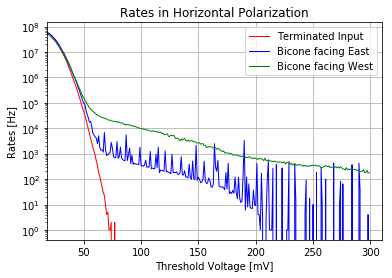

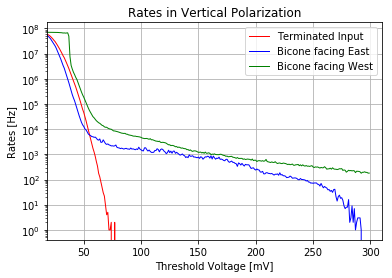

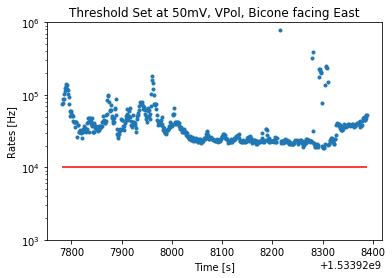

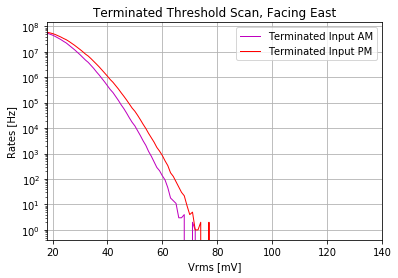

In [163]:
pyp.figure(1)
pyp.semilogy(threshTerm13.thresholdmV*10**3, threshTerm13.rates, 'r',linewidth=1,label='Terminated Input')
pyp.semilogy(hpolAnt14.thresholdmV*10**3, hpolAnt14.rates, 'b', linewidth=1,label='Bicone facing East')
pyp.semilogy(hpolAnt20.thresholdmV*10**3, hpolAnt20.rates, 'g', linewidth=1,label='Bicone facing West')

pyp.xlabel('Threshold Voltage [mV]')
pyp.ylabel('Rates [Hz]')
pyp.title('Rates in Horizontal Polarization')
pyp.legend()
pyp.grid()
pyp.xlim(18,310)
pyp.savefig("/home/radio/Desktop/PhotonCounterRates1.pdf")

pyp.figure(2)
pyp.semilogy(threshTerm13.thresholdmV*10**3, threshTerm13.rates, 'r',linewidth=1,label='Terminated Input')
#pyp.semilogy(threshTerm4.thresholdmV*10**3, threshTerm4.rates, 'c',linewidth=1,label='Terminated Input')
pyp.semilogy(vpolAnt7.thresholdmV*10**3, vpolAnt7.rates, 'b', linewidth=1,label='Bicone facing East')
pyp.semilogy(vpolAnt12.thresholdmV*10**3, vpolAnt12.rates, 'g', linewidth=1,label='Bicone facing West')
pyp.xlabel('Threshold Voltage [mV]')
pyp.ylabel('Rates [Hz]')
pyp.title('Rates in Vertical Polarization')
pyp.legend()
pyp.grid()
pyp.xlim(18,310)
pyp.savefig("/home/radio/Desktop/PhotonCounterRates2.pdf")

pyp.figure(3)
pyp.semilogy(rates130mV.timestamp, rates130mV.rates, '.')
pyp.hlines(10000,rates130mV.timestamp.max(),rates130mV.timestamp.min(),'r')
pyp.ylabel('Rates [Hz]')
pyp.xlabel('Time [s]')
pyp.title('Threshold Set at 50mV, VPol, Bicone facing East')
pyp.ylim(10**3,10**6)
pyp.savefig("/home/radio/Desktop/PhotonCounterRateAt50mV.pdf")

pyp.figure(4)
pyp.semilogy(threshTerm4.thresholdmV*10**3, threshTerm4.rates, 'm',linewidth=1,label='Terminated Input AM')
pyp.semilogy(threshTerm13.thresholdmV*10**3, threshTerm13.rates, 'r',linewidth=1,label='Terminated Input PM')
pyp.xlabel('Vrms [mV]')
pyp.ylabel('Rates [Hz]')
pyp.title('Terminated Threshold Scan, Facing East')
pyp.legend()
pyp.grid()
pyp.xlim(18,140)
pyp.savefig("/home/radio/Desktop/PhotonCounterRatesTerm.pdf")

# UHF Spectra

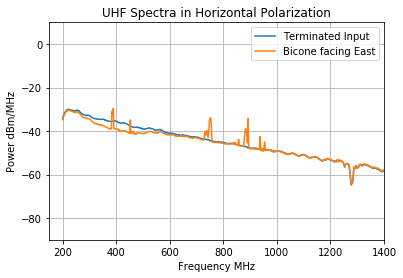

In [101]:
measDirc = "/home/radio/data/beacon_august2018/20180810/"
measDircThur = "/home/radio/data/beacon_august2018/20180809/"
measDircSat = "/home/radio/data/beacon_august2018/20180811/"

termFi23 = measDirc + 'specanalyzer_run23_2018-08-10_15-29-50.hdf5'
termSpecHead23 = pd.read_hdf(termFi23, key='header')
termSpectra23 = pd.read_hdf(termFi23, key='spectra')

antFi27 = measDirc + 'specanalyzer_run27_2018-08-10_15-52-49.hdf5'
antSpecHead27 = pd.read_hdf(antFi27, key='header')
antSpectra27 = pd.read_hdf(antFi27, key='spectra')

spec = termSpectra23[termSpectra23.keys()[0]]
rbw = 0.3 # MHz. Fix later. Read from header
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw)+9.9, label='Terminated Input' )

spec = antSpectra27[antSpectra27.keys()[0]]
pyp.plot(spec.freq_hz/1e6,spec.power_dBm - 10*np.log10(rbw)+9.9, label='Bicone facing East')

pyp.legend()
pyp.grid()
pyp.ylabel('Power dBm/MHz')
pyp.xlabel('Frequency MHz')
pyp.title('UHF Spectra in Horizontal Polarization')
pyp.xlim(150,1400)
pyp.ylim(-90,10)

pyp.savefig("/home/radio/Desktop/UHFSpectraTermVsAnt.pdf")
